# OpenAI Gym

- Installation in Windows was actually simple! Just: pip install gym
- Good extra info: https://hunkim.github.io/ml/RL/rl03.pdf

## CartPole

- General info: https://gym.openai.com/envs/CartPole-v0/
- Description of states, actions, etc: https://github.com/openai/gym/wiki/CartPole-v0
- Environment: deterministic (action determines the next state, given current state)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode finished at step: 30
Episode finished at step: 59
Episode finished at step: 18
Episode finished at step: 36
Episode finished at step: 10
Episode finished at step: 19
Episode finished at step: 18
Episode finished at step: 16
Episode finished at step: 12
Episode finished at step: 42
Episode finished at step: 19
Episode finished at step: 43
Episode finished at step: 24
Episode finished at step: 14
Episode finished at step: 18
Episode finished at step: 14
Episode finished at step: 56
Episode finished at step: 22
Episode finished at step: 17
Episode finished at step: 25
Episode finished at step: 14
Episode finished at step: 20
Episode finished at step: 18
Episode finished at step: 21
Episode finished at step: 15
Episode finished at step: 11
Episode finished at step: 28
Episode finished at step: 10
Episode finished at step: 32
Episode finished at step: 18
Episode finished at step: 16
Ep

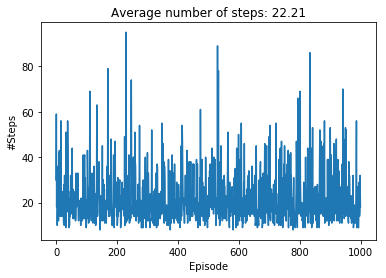

In [6]:
import gym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

env = gym.make('CartPole-v1')

num_episodes = 1000

all_steps = [] # store all steps

# Can save video of the rendered window
#spath = './videosGym'
#env = gym.wrappers.Monitor(env,spath)

for i_episodes in range(num_episodes):
    
    state = env.reset()
    
    step = 0
    
    #for step in range(100):
    while True:
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        
        # States: [cart position,cart velocity,pole angle, pole velocity]
        #print(state,info)
        
        # This will show the game
        #env.render()
        
        if done:
            all_steps.append(step)
            print('Episode finished at step:',step)
            break
        
plt.plot(all_steps)
plt.title('Average number of steps: %2.2f'%(np.mean(all_steps)))
plt.xlabel('Episode')
plt.ylabel('#Steps')
plt.show()

## CartPole-v0 (to have as baseline)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode finished after 12 steps
Episode finished after 12 steps
Episode finished after 14 steps
Episode finished after 17 steps
Episode finished after 21 steps
Episode finished after 17 steps
Episode finished after 23 steps
Episode finished after 14 steps
Episode finished after 18 steps
Episode finished after 43 steps
Episode finished after 15 steps
Episode finished after 14 steps
Episode finished after 41 steps
Episode finished after 41 steps
Episode finished after 17 steps
Episode finished after 17 steps
Episode finished after 29 steps
Episode finished after 52 steps
Episode finished after 16 steps
Episode finished after 81 steps
Episode finished after 13 steps
Episode finished after 23 steps
Episode finished after 23 steps
Episode finished after 22 steps
Episode finished after 26 steps
Episode finished after 28 steps
Episode finished after 11 steps
Episode finished after 15 steps
Episo

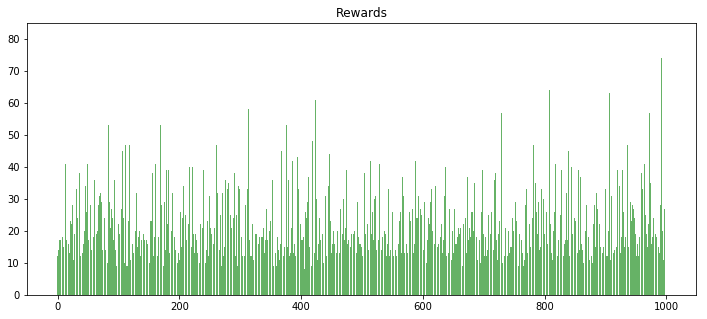

In [10]:
import gym
import torch
import random

import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

seed_value = 23
env.seed(seed_value)
torch.manual_seed(seed_value)
random.seed(seed_value)

num_episodes = 1000

steps_total = []

for i_episode in range(num_episodes):
    
    state = env.reset()
    
    step = 0
    #for step in range(100):
    while True:
        
        step += 1
        
        action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
        
        #env.render()
        
        if done:
            steps_total.append(step)
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: %.2f" % (sum(steps_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()
env.env.close()

## Changing environment initial settings

Go to the local gym installation settings and you will see all the environments!

C:\Users\jaime\Anaconda3\envs\cvision\Lib\site-packages\gym\envs\classic_control

## Frozen Lake

- Example of a stochastic environment (next state is uncertain given action). You can change this by changing the environment settings.

In [7]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

env = gym.make('FrozenLake-v0')

#num_episodes = 1000
num_episodes = 10

all_steps = [] # store all steps

# Can save video of the rendered window
#spath = './videosGym'
#env = gym.wrappers.Monitor(env,spath)

for i_episodes in range(num_episodes):
    
    state = env.reset()
    
    step = 0
    
    #for step in range(100):
    while True:
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        
        # States: 
        print(new_state)
        print(info)
        
        time.sleep(0.5)
        # This will show the game
        env.render()
        
        if done:
            all_steps.append(step)
            print('Episode finished at step:',step)
            break
        
plt.plot(all_steps)
plt.title('Average number of steps: %2.2f'%(np.mean(all_steps)))
plt.xlabel('Episode')
plt.ylabel('#Steps')
plt.show()

0
{'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
0
{'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
4
{'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
5
{'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode finished at step: 4
0
{'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
4
{'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4
{'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
0
{'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
4
{'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
8
{'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
9
{'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
5
{'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
Episode finished at step: 8
1
{'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
5
{'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode finished at step: 2
0
{'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
0
{'prob': 0.333333

KeyboardInterrupt: 

## Solving Bellman's Eq. (Monte Carlo?)
### a) Frozen Lake (Deterministic)

*** Start of episode state:0 ***
Game over at step:14
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:5
*** Start of episode state:0 ***
Game over at step:6
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:14
*** Start of episode state:0 ***
Game over at step:5
*** Start of episode state:0 ***
Game over at step:23
*** Start of episode state:0 ***
Game over at step:20
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:7
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over

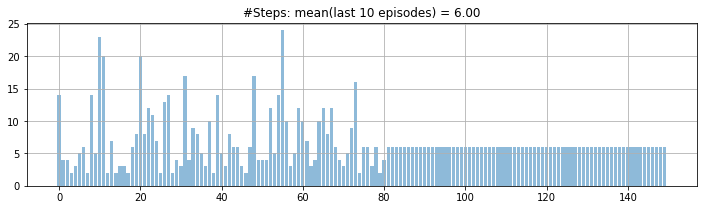

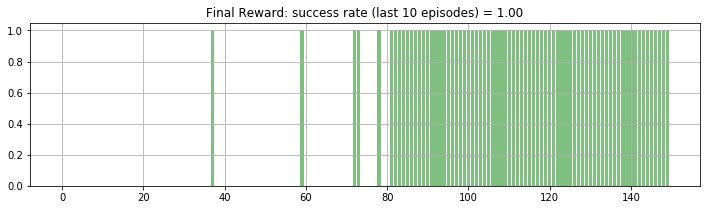

In [61]:
import torch
torch.__version__
import gym
import time
import matplotlib.pyplot as plt

from gym.envs.registration import register
#  Allow setting the environment!
''' 
(RUN ONCE)
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}, # deterministic
)
'''

env = gym.make('FrozenLakeNotSlippery-v0')
# get some info
nstates = env.observation_space.n
nactions = env.action_space.n
# Create the Q(s,a) table with torch
Q = torch.zeros([nstates,nactions])

# Learning setting
nepisodes = 150
gamma = 1 # no delay discounting
# Aux vars
all_steps = []
all_rewards = []
dicA = {0:'left',1:'down',2:'right',3:'up'}
for i in range(nepisodes):
    # Initial state
    state = env.reset()
    step = 0
    print('*** Start of episode state:%d ***'%(state))
    
    while True:
        step += 1
        
        # 1) ACTION: random sample based on the Q(state) - think like distrib!
        rand_R = Q[state]+torch.rand(1,nactions)/1000
        action = torch.max(rand_R,1)[1][0] # return the index of action with max rand_R
        # 2) NEXT STATE: given by the Gym environment
        new_state, reward, done, info = env.step(action)
        # 3) UPDATE Q(s,a): Bellman's Eq
        Q[state,action]= reward + gamma* torch.max(Q[new_state])
        # Print some info
        #print('Step%d: action=%s, state=%d, new_state=%d, reward=%d'%(step,dicA[action],state,new_state,reward))
        #env.render()
        
        # 4) UPDATE next state
        state = new_state
        
        # 5) GAME-OVER: if get done from environment
        if done:
            # Gather info
            all_steps.append(step)
            all_rewards.append(reward) # failure:0/success:1 when done
            print('Game over at step:%d'%step)
            break

# Analysis
print('Q(s,a) table:',Q)
plt.figure(figsize=(12,3))
plt.title('#Steps: mean(last 10 episodes) = %.2f'%(sum(all_steps[-10:])/10))
plt.bar(range(len(all_steps)),all_steps,alpha=0.5)
plt.grid()
plt.show()

plt.figure(figsize=(12,3))
plt.title('Final Reward: success rate (last 10 episodes) = %.2f'%(sum(all_rewards[-10:])/10))
plt.bar(range(len(all_rewards)),all_rewards,alpha=0.5,color='green')
plt.grid()
plt.show()

### b) FrozenLake (Stochastic) --> MC does not work... not able to learn...

*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:10
*** Start of episode state:0 ***
Game over at step:9
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:17
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:2
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over at step:8
*** Start of episode state:0 ***
Game over at step:7
*** Start of episode state:0 ***
Game over at step:9
*** Start of episode state:0 ***
Game over at step:11
*** Start of episode state:0 ***
Game over at step:3
*** Start of episode state:0 ***
Game over at step:4
*** Start of episode state:0 ***
Game over 

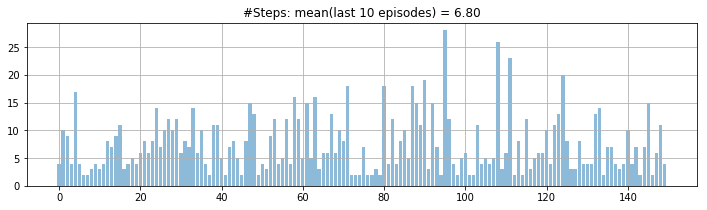

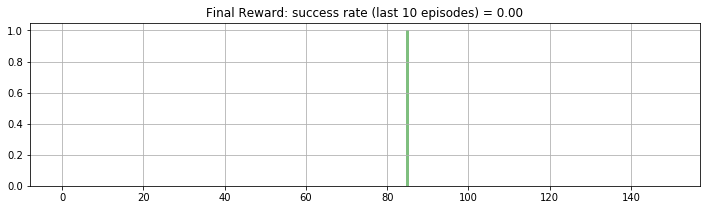

In [3]:
import torch
torch.__version__
import gym
import time
import matplotlib.pyplot as plt
%matplotlib inline

from gym.envs.registration import register
#  Allow setting the environment!

'''
#(RUN ONCE)
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}, # stochastic
)
'''



env = gym.make('FrozenLakeNotSlippery-v0')
# get some info
nstates = env.observation_space.n
nactions = env.action_space.n
# Create the Q(s,a) table with torch
Q = torch.zeros([nstates,nactions])

# Learning setting
nepisodes = 150
gamma = 1 # no delay discounting
# Aux vars
all_steps = []
all_rewards = []
dicA = {0:'left',1:'down',2:'right',3:'up'}
for i in range(nepisodes):
    # Initial state
    state = env.reset()
    step = 0
    print('*** Start of episode state:%d ***'%(state))
    
    while True:
        step += 1
        
        # 1) ACTION: random sample based on the Q(state) - think like distrib!
        rand_R = Q[state]+torch.rand(1,nactions)/1000
        action = torch.max(rand_R,1)[1][0] # return the index of action with max rand_R
        # 2) NEXT STATE: given by the Gym environment
        new_state, reward, done, info = env.step(action)
        # 3) UPDATE Q(s,a): Bellman's Eq
        Q[state,action]= reward + gamma* torch.max(Q[new_state])
        # Print some info
        #print('Step%d: action=%s, state=%d, new_state=%d, reward=%d'%(step,dicA[action],state,new_state,reward))
        #env.render()
        
        # 4) UPDATE next state
        state = new_state
        
        # 5) GAME-OVER: if get done from environment
        if done:
            # Gather info
            all_steps.append(step)
            all_rewards.append(reward) # failure:0/success:1 when done
            print('Game over at step:%d'%step)
            break

# Analysis
print('Q(s,a) table:',Q)
plt.figure(figsize=(12,3))
plt.title('#Steps: mean(last 10 episodes) = %.2f'%(sum(all_steps[-10:])/10))
plt.bar(range(len(all_steps)),all_steps,alpha=0.5)
plt.grid()
plt.show()

plt.figure(figsize=(12,3))
plt.title('Final Reward: success rate (last 10 episodes) = %.2f'%(sum(all_rewards[-10:])/10))
plt.bar(range(len(all_rewards)),all_rewards,alpha=0.5,color='green')
plt.grid()
plt.show()

## Q-Learning
### Example: Frozen Lake (Stochastic)

*** Run#0 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.586,0.082
1,0.600,0.65,8.888,0.042
2,0.600,0.70,8.918,0.078
3,0.600,0.75,9.358,0.076
4,0.600,0.80,8.318,0.018
5,0.600,0.85,8.480,0.042
6,0.600,0.90,8.754,0.064
7,0.600,0.95,8.496,0.062
8,0.650,0.60,14.550,0.172
9,0.650,0.65,10.586,0.104


*** Run#1 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.332,0.172
1,0.600,0.65,10.998,0.144
2,0.600,0.70,10.362,0.118
3,0.600,0.75,9.192,0.100
4,0.600,0.80,9.550,0.130
5,0.600,0.85,8.888,0.088
6,0.600,0.90,9.584,0.130
7,0.600,0.95,7.944,0.020
8,0.650,0.60,10.662,0.110
9,0.650,0.65,10.142,0.072


*** Run#2 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.034,0.120
1,0.600,0.65,9.670,0.080
2,0.600,0.70,9.472,0.086
3,0.600,0.75,9.450,0.104
4,0.600,0.80,9.136,0.066
5,0.600,0.85,8.888,0.064
6,0.600,0.90,8.796,0.052
7,0.600,0.95,8.420,0.034
8,0.650,0.60,9.656,0.098
9,0.650,0.65,10.780,0.118


*** Run#3 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.868,0.202
1,0.600,0.65,11.302,0.128
2,0.600,0.70,10.880,0.162
3,0.600,0.75,8.988,0.092
4,0.600,0.80,7.876,0.040
5,0.600,0.85,8.476,0.070
6,0.600,0.90,8.346,0.054
7,0.600,0.95,8.740,0.064
8,0.650,0.60,10.822,0.124
9,0.650,0.65,11.082,0.120


*** Run#4 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.204,0.100
1,0.600,0.65,10.626,0.122
2,0.600,0.70,12.058,0.148
3,0.600,0.75,9.248,0.094
4,0.600,0.80,8.666,0.042
5,0.600,0.85,9.346,0.092
6,0.600,0.90,8.516,0.060
7,0.600,0.95,8.852,0.070
8,0.650,0.60,11.108,0.090
9,0.650,0.65,11.358,0.108


*** Run#5 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.826,0.144
1,0.600,0.65,10.584,0.120
2,0.600,0.70,11.200,0.154
3,0.600,0.75,9.202,0.098
4,0.600,0.80,8.474,0.056
5,0.600,0.85,8.994,0.074
6,0.600,0.90,7.768,0.020
7,0.600,0.95,8.056,0.034
8,0.650,0.60,9.588,0.106
9,0.650,0.65,9.408,0.060


*** Run#6 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.234,0.150
1,0.600,0.65,10.434,0.130
2,0.600,0.70,11.420,0.170
3,0.600,0.75,8.774,0.092
4,0.600,0.80,9.278,0.048
5,0.600,0.85,8.936,0.058
6,0.600,0.90,8.100,0.052
7,0.600,0.95,8.398,0.082
8,0.650,0.60,10.146,0.096
9,0.650,0.65,10.150,0.106


*** Run#7 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.786,0.140
1,0.600,0.65,10.412,0.148
2,0.600,0.70,10.610,0.124
3,0.600,0.75,9.682,0.088
4,0.600,0.80,10.450,0.142
5,0.600,0.85,8.542,0.078
6,0.600,0.90,8.782,0.070
7,0.600,0.95,8.750,0.076
8,0.650,0.60,11.480,0.134
9,0.650,0.65,11.874,0.156


*** Run#8 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.420,0.136
1,0.600,0.65,11.186,0.102
2,0.600,0.70,8.304,0.064
3,0.600,0.75,8.974,0.060
4,0.600,0.80,8.356,0.030
5,0.600,0.85,8.314,0.042
6,0.600,0.90,7.638,0.030
7,0.600,0.95,7.582,0.030
8,0.650,0.60,8.928,0.028
9,0.650,0.65,10.112,0.058


*** Run#9 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.110,0.170
1,0.600,0.65,11.078,0.120
2,0.600,0.70,8.158,0.056
3,0.600,0.75,9.468,0.062
4,0.600,0.80,10.320,0.110
5,0.600,0.85,8.398,0.058
6,0.600,0.90,7.864,0.020
7,0.600,0.95,9.266,0.066
8,0.650,0.60,10.920,0.128
9,0.650,0.65,12.306,0.142


*** Run#10 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.000,0.144
1,0.600,0.65,11.368,0.156
2,0.600,0.70,9.408,0.074
3,0.600,0.75,9.720,0.096
4,0.600,0.80,8.814,0.082
5,0.600,0.85,9.182,0.088
6,0.600,0.90,9.330,0.066
7,0.600,0.95,8.594,0.048
8,0.650,0.60,10.730,0.108
9,0.650,0.65,9.340,0.062


*** Run#11 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.608,0.128
1,0.600,0.65,10.196,0.138
2,0.600,0.70,10.938,0.130
3,0.600,0.75,10.068,0.100
4,0.600,0.80,8.994,0.112
5,0.600,0.85,9.304,0.076
6,0.600,0.90,9.198,0.094
7,0.600,0.95,8.750,0.060
8,0.650,0.60,12.234,0.150
9,0.650,0.65,12.988,0.172


*** Run#12 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.290,0.198
1,0.600,0.65,10.160,0.120
2,0.600,0.70,9.772,0.082
3,0.600,0.75,9.292,0.092
4,0.600,0.80,9.404,0.088
5,0.600,0.85,8.606,0.050
6,0.600,0.90,8.950,0.066
7,0.600,0.95,8.204,0.046
8,0.650,0.60,14.258,0.218
9,0.650,0.65,12.630,0.164


*** Run#13 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.950,0.194
1,0.600,0.65,9.684,0.112
2,0.600,0.70,9.370,0.074
3,0.600,0.75,10.264,0.120
4,0.600,0.80,9.790,0.108
5,0.600,0.85,9.092,0.058
6,0.600,0.90,8.594,0.038
7,0.600,0.95,8.420,0.052
8,0.650,0.60,12.898,0.156
9,0.650,0.65,10.818,0.110


*** Run#14 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.838,0.148
1,0.600,0.65,11.974,0.156
2,0.600,0.70,10.102,0.072
3,0.600,0.75,8.996,0.086
4,0.600,0.80,9.466,0.086
5,0.600,0.85,8.798,0.058
6,0.600,0.90,9.002,0.088
7,0.600,0.95,8.494,0.062
8,0.650,0.60,8.612,0.056
9,0.650,0.65,10.462,0.086


*** Run#15 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.454,0.110
1,0.600,0.65,11.520,0.148
2,0.600,0.70,9.570,0.110
3,0.600,0.75,9.546,0.112
4,0.600,0.80,9.570,0.104
5,0.600,0.85,8.226,0.074
6,0.600,0.90,8.690,0.090
7,0.600,0.95,8.634,0.070
8,0.650,0.60,8.056,0.028
9,0.650,0.65,11.258,0.100


*** Run#16 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.928,0.094
1,0.600,0.65,10.592,0.134
2,0.600,0.70,9.598,0.078
3,0.600,0.75,9.850,0.124
4,0.600,0.80,9.266,0.078
5,0.600,0.85,9.048,0.084
6,0.600,0.90,9.250,0.092
7,0.600,0.95,8.292,0.036
8,0.650,0.60,9.740,0.100
9,0.650,0.65,10.998,0.140


*** Run#17 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.178,0.164
1,0.600,0.65,9.784,0.116
2,0.600,0.70,11.878,0.146
3,0.600,0.75,9.252,0.072
4,0.600,0.80,10.500,0.104
5,0.600,0.85,10.146,0.112
6,0.600,0.90,8.222,0.054
7,0.600,0.95,8.238,0.034
8,0.650,0.60,9.060,0.060
9,0.650,0.65,11.798,0.110


*** Run#18 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.322,0.150
1,0.600,0.65,9.976,0.088
2,0.600,0.70,9.666,0.116
3,0.600,0.75,8.958,0.092
4,0.600,0.80,9.014,0.072
5,0.600,0.85,9.120,0.080
6,0.600,0.90,8.204,0.048
7,0.600,0.95,8.290,0.058
8,0.650,0.60,13.146,0.176
9,0.650,0.65,9.282,0.062


*** Run#19 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.364,0.146
1,0.600,0.65,10.544,0.090
2,0.600,0.70,8.314,0.042
3,0.600,0.75,10.090,0.114
4,0.600,0.80,9.628,0.074
5,0.600,0.85,9.720,0.114
6,0.600,0.90,8.534,0.078
7,0.600,0.95,8.242,0.024
8,0.650,0.60,9.608,0.080
9,0.650,0.65,11.054,0.102


*** Run#20 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.506,0.134
1,0.600,0.65,9.876,0.098
2,0.600,0.70,10.822,0.104
3,0.600,0.75,9.832,0.106
4,0.600,0.80,9.944,0.108
5,0.600,0.85,9.334,0.084
6,0.600,0.90,8.900,0.066
7,0.600,0.95,8.426,0.024
8,0.650,0.60,14.192,0.152
9,0.650,0.65,11.094,0.114


*** Run#21 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.396,0.104
1,0.600,0.65,8.716,0.052
2,0.600,0.70,8.568,0.044
3,0.600,0.75,7.786,0.010
4,0.600,0.80,9.442,0.056
5,0.600,0.85,9.224,0.052
6,0.600,0.90,8.170,0.048
7,0.600,0.95,8.140,0.036
8,0.650,0.60,10.974,0.120
9,0.650,0.65,8.810,0.050


*** Run#22 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.964,0.176
1,0.600,0.65,9.868,0.104
2,0.600,0.70,10.814,0.144
3,0.600,0.75,8.742,0.066
4,0.600,0.80,8.604,0.056
5,0.600,0.85,8.952,0.040
6,0.600,0.90,8.262,0.024
7,0.600,0.95,8.544,0.048
8,0.650,0.60,13.688,0.168
9,0.650,0.65,11.474,0.104


*** Run#23 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.368,0.160
1,0.600,0.65,9.992,0.090
2,0.600,0.70,10.008,0.132
3,0.600,0.75,10.060,0.108
4,0.600,0.80,8.652,0.078
5,0.600,0.85,8.510,0.054
6,0.600,0.90,7.930,0.028
7,0.600,0.95,8.066,0.042
8,0.650,0.60,11.796,0.128
9,0.650,0.65,12.432,0.162


*** Run#24 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.284,0.148
1,0.600,0.65,10.356,0.108
2,0.600,0.70,10.542,0.172
3,0.600,0.75,9.902,0.136
4,0.600,0.80,8.300,0.058
5,0.600,0.85,9.070,0.048
6,0.600,0.90,8.592,0.062
7,0.600,0.95,8.782,0.058
8,0.650,0.60,11.804,0.110
9,0.650,0.65,10.840,0.078


*** Run#25 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.884,0.064
1,0.600,0.65,8.552,0.046
2,0.600,0.70,8.604,0.054
3,0.600,0.75,9.454,0.062
4,0.600,0.80,8.400,0.018
5,0.600,0.85,8.134,0.050
6,0.600,0.90,8.696,0.086
7,0.600,0.95,8.480,0.072
8,0.650,0.60,10.972,0.102
9,0.650,0.65,9.884,0.086


*** Run#26 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.610,0.110
1,0.600,0.65,10.020,0.142
2,0.600,0.70,9.958,0.098
3,0.600,0.75,10.078,0.120
4,0.600,0.80,9.434,0.126
5,0.600,0.85,10.392,0.128
6,0.600,0.90,8.898,0.066
7,0.600,0.95,7.916,0.046
8,0.650,0.60,9.248,0.078
9,0.650,0.65,11.662,0.152


*** Run#27 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.088,0.152
1,0.600,0.65,11.710,0.158
2,0.600,0.70,10.946,0.144
3,0.600,0.75,8.402,0.074
4,0.600,0.80,9.950,0.072
5,0.600,0.85,8.454,0.036
6,0.600,0.90,8.316,0.042
7,0.600,0.95,9.584,0.078
8,0.650,0.60,10.146,0.082
9,0.650,0.65,13.556,0.222


*** Run#28 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.348,0.152
1,0.600,0.65,9.430,0.108
2,0.600,0.70,9.400,0.094
3,0.600,0.75,9.888,0.118
4,0.600,0.80,9.626,0.080
5,0.600,0.85,7.978,0.022
6,0.600,0.90,8.554,0.048
7,0.600,0.95,7.834,0.018
8,0.650,0.60,9.640,0.050
9,0.650,0.65,9.588,0.046


*** Run#29 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.578,0.116
1,0.600,0.65,10.870,0.160
2,0.600,0.70,10.718,0.130
3,0.600,0.75,9.620,0.102
4,0.600,0.80,9.854,0.078
5,0.600,0.85,8.546,0.044
6,0.600,0.90,8.838,0.070
7,0.600,0.95,8.182,0.032
8,0.650,0.60,11.204,0.128
9,0.650,0.65,8.856,0.082


*** Run#30 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.824,0.138
1,0.600,0.65,11.256,0.154
2,0.600,0.70,8.450,0.048
3,0.600,0.75,9.142,0.070
4,0.600,0.80,9.366,0.090
5,0.600,0.85,8.694,0.068
6,0.600,0.90,8.524,0.046
7,0.600,0.95,8.374,0.042
8,0.650,0.60,10.318,0.112
9,0.650,0.65,9.574,0.094


*** Run#31 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.054,0.138
1,0.600,0.65,11.266,0.154
2,0.600,0.70,10.912,0.124
3,0.600,0.75,10.152,0.142
4,0.600,0.80,10.340,0.094
5,0.600,0.85,9.272,0.088
6,0.600,0.90,10.074,0.138
7,0.600,0.95,8.020,0.040
8,0.650,0.60,9.610,0.060
9,0.650,0.65,9.532,0.092


*** Run#32 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.072,0.146
1,0.600,0.65,11.604,0.148
2,0.600,0.70,10.726,0.100
3,0.600,0.75,8.488,0.050
4,0.600,0.80,8.336,0.048
5,0.600,0.85,8.110,0.038
6,0.600,0.90,8.626,0.084
7,0.600,0.95,8.708,0.086
8,0.650,0.60,13.084,0.148
9,0.650,0.65,12.942,0.110


*** Run#33 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.264,0.144
1,0.600,0.65,11.442,0.136
2,0.600,0.70,10.350,0.148
3,0.600,0.75,9.510,0.100
4,0.600,0.80,9.166,0.064
5,0.600,0.85,9.028,0.084
6,0.600,0.90,8.434,0.044
7,0.600,0.95,8.894,0.072
8,0.650,0.60,9.304,0.062
9,0.650,0.65,11.578,0.132


*** Run#34 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.344,0.134
1,0.600,0.65,11.288,0.132
2,0.600,0.70,11.558,0.150
3,0.600,0.75,10.278,0.098
4,0.600,0.80,9.220,0.104
5,0.600,0.85,9.592,0.088
6,0.600,0.90,8.436,0.062
7,0.600,0.95,8.650,0.062
8,0.650,0.60,8.514,0.096
9,0.650,0.65,11.048,0.134


*** Run#35 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.222,0.134
1,0.600,0.65,9.980,0.104
2,0.600,0.70,8.980,0.072
3,0.600,0.75,9.850,0.126
4,0.600,0.80,9.072,0.066
5,0.600,0.85,8.558,0.076
6,0.600,0.90,8.456,0.042
7,0.600,0.95,8.580,0.070
8,0.650,0.60,9.698,0.070
9,0.650,0.65,10.270,0.088


*** Run#36 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.000,0.172
1,0.600,0.65,10.202,0.146
2,0.600,0.70,10.184,0.126
3,0.600,0.75,9.370,0.086
4,0.600,0.80,9.030,0.082
5,0.600,0.85,9.904,0.098
6,0.600,0.90,8.134,0.058
7,0.600,0.95,8.458,0.072
8,0.650,0.60,9.682,0.100
9,0.650,0.65,10.242,0.102


*** Run#37 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.350,0.160
1,0.600,0.65,9.958,0.122
2,0.600,0.70,9.754,0.118
3,0.600,0.75,10.170,0.114
4,0.600,0.80,10.222,0.106
5,0.600,0.85,9.770,0.072
6,0.600,0.90,7.750,0.032
7,0.600,0.95,8.338,0.022
8,0.650,0.60,8.732,0.062
9,0.650,0.65,10.000,0.080


*** Run#38 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.058,0.190
1,0.600,0.65,9.334,0.080
2,0.600,0.70,10.762,0.132
3,0.600,0.75,10.838,0.138
4,0.600,0.80,9.254,0.070
5,0.600,0.85,9.054,0.082
6,0.600,0.90,7.526,0.026
7,0.600,0.95,8.190,0.042
8,0.650,0.60,10.470,0.086
9,0.650,0.65,10.546,0.120


*** Run#39 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.830,0.108
1,0.600,0.65,10.238,0.100
2,0.600,0.70,8.922,0.060
3,0.600,0.75,8.692,0.054
4,0.600,0.80,8.970,0.056
5,0.600,0.85,9.680,0.088
6,0.600,0.90,8.956,0.074
7,0.600,0.95,8.596,0.064
8,0.650,0.60,10.254,0.120
9,0.650,0.65,10.942,0.148


*** Run#40 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.642,0.138
1,0.600,0.65,11.684,0.148
2,0.600,0.70,10.048,0.112
3,0.600,0.75,9.270,0.056
4,0.600,0.80,9.454,0.074
5,0.600,0.85,8.548,0.050
6,0.600,0.90,9.102,0.070
7,0.600,0.95,8.572,0.046
8,0.650,0.60,9.806,0.112
9,0.650,0.65,13.024,0.198


*** Run#41 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,8.346,0.048
1,0.600,0.65,8.762,0.052
2,0.600,0.70,8.298,0.044
3,0.600,0.75,8.874,0.068
4,0.600,0.80,9.444,0.092
5,0.600,0.85,8.330,0.032
6,0.600,0.90,8.238,0.038
7,0.600,0.95,8.452,0.022
8,0.650,0.60,8.654,0.034
9,0.650,0.65,9.620,0.058


*** Run#42 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.622,0.082
1,0.600,0.65,8.972,0.068
2,0.600,0.70,11.080,0.126
3,0.600,0.75,8.314,0.056
4,0.600,0.80,8.166,0.030
5,0.600,0.85,8.252,0.054
6,0.600,0.90,8.836,0.056
7,0.600,0.95,8.076,0.028
8,0.650,0.60,10.858,0.088
9,0.650,0.65,9.452,0.074


*** Run#43 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.136,0.112
1,0.600,0.65,8.588,0.036
2,0.600,0.70,9.248,0.062
3,0.600,0.75,8.184,0.058
4,0.600,0.80,8.718,0.050
5,0.600,0.85,9.202,0.092
6,0.600,0.90,7.918,0.064
7,0.600,0.95,8.262,0.064
8,0.650,0.60,10.688,0.088
9,0.650,0.65,11.206,0.090


*** Run#44 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.372,0.070
1,0.600,0.65,9.576,0.100
2,0.600,0.70,9.668,0.092
3,0.600,0.75,10.346,0.128
4,0.600,0.80,10.078,0.096
5,0.600,0.85,9.258,0.078
6,0.600,0.90,9.678,0.082
7,0.600,0.95,7.810,0.010
8,0.650,0.60,9.094,0.034
9,0.650,0.65,9.782,0.088


*** Run#45 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.120,0.108
1,0.600,0.65,10.694,0.122
2,0.600,0.70,9.436,0.082
3,0.600,0.75,9.854,0.114
4,0.600,0.80,10.052,0.132
5,0.600,0.85,10.224,0.104
6,0.600,0.90,8.128,0.044
7,0.600,0.95,8.430,0.054
8,0.650,0.60,10.604,0.110
9,0.650,0.65,10.764,0.108


*** Run#46 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.416,0.044
1,0.600,0.65,9.056,0.050
2,0.600,0.70,8.370,0.036
3,0.600,0.75,9.752,0.086
4,0.600,0.80,9.010,0.058
5,0.600,0.85,9.186,0.066
6,0.600,0.90,8.786,0.052
7,0.600,0.95,8.070,0.040
8,0.650,0.60,9.696,0.096
9,0.650,0.65,11.866,0.122


*** Run#47 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.084,0.082
1,0.600,0.65,9.428,0.070
2,0.600,0.70,10.064,0.098
3,0.600,0.75,10.978,0.112
4,0.600,0.80,10.068,0.082
5,0.600,0.85,8.888,0.056
6,0.600,0.90,8.242,0.062
7,0.600,0.95,9.002,0.060
8,0.650,0.60,10.666,0.104
9,0.650,0.65,10.052,0.082


*** Run#48 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.328,0.164
1,0.600,0.65,11.388,0.152
2,0.600,0.70,9.942,0.114
3,0.600,0.75,10.334,0.112
4,0.600,0.80,9.378,0.066
5,0.600,0.85,8.496,0.060
6,0.600,0.90,8.668,0.058
7,0.600,0.95,8.236,0.030
8,0.650,0.60,12.728,0.164
9,0.650,0.65,10.706,0.118


*** Run#49 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.480,0.162
1,0.600,0.65,9.202,0.062
2,0.600,0.70,10.318,0.110
3,0.600,0.75,9.786,0.078
4,0.600,0.80,9.438,0.106
5,0.600,0.85,9.826,0.096
6,0.600,0.90,8.842,0.058
7,0.600,0.95,7.734,0.036
8,0.650,0.60,13.278,0.194
9,0.650,0.65,12.152,0.160


*** Run#50 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.906,0.088
1,0.600,0.65,11.230,0.148
2,0.600,0.70,10.924,0.142
3,0.600,0.75,9.858,0.100
4,0.600,0.80,9.590,0.084
5,0.600,0.85,8.550,0.082
6,0.600,0.90,7.972,0.020
7,0.600,0.95,8.152,0.026
8,0.650,0.60,9.018,0.042
9,0.650,0.65,9.536,0.062


*** Run#51 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.172,0.186
1,0.600,0.65,10.078,0.122
2,0.600,0.70,10.008,0.104
3,0.600,0.75,9.440,0.092
4,0.600,0.80,8.520,0.062
5,0.600,0.85,9.320,0.086
6,0.600,0.90,9.112,0.078
7,0.600,0.95,7.928,0.024
8,0.650,0.60,10.804,0.122
9,0.650,0.65,13.724,0.178


*** Run#52 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.260,0.126
1,0.600,0.65,9.784,0.086
2,0.600,0.70,10.070,0.108
3,0.600,0.75,8.386,0.072
4,0.600,0.80,10.262,0.118
5,0.600,0.85,9.316,0.088
6,0.600,0.90,8.580,0.072
7,0.600,0.95,9.238,0.100
8,0.650,0.60,11.410,0.142
9,0.650,0.65,13.838,0.220


*** Run#53 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.778,0.164
1,0.600,0.65,10.172,0.100
2,0.600,0.70,10.378,0.132
3,0.600,0.75,10.120,0.124
4,0.600,0.80,9.074,0.086
5,0.600,0.85,8.524,0.066
6,0.600,0.90,9.666,0.112
7,0.600,0.95,9.124,0.068
8,0.650,0.60,7.830,0.046
9,0.650,0.65,9.848,0.138


*** Run#54 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.600,0.110
1,0.600,0.65,10.882,0.160
2,0.600,0.70,10.806,0.110
3,0.600,0.75,9.166,0.050
4,0.600,0.80,8.536,0.068
5,0.600,0.85,8.464,0.066
6,0.600,0.90,8.576,0.042
7,0.600,0.95,8.088,0.042
8,0.650,0.60,10.758,0.100
9,0.650,0.65,9.704,0.056


*** Run#55 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.838,0.078
1,0.600,0.65,9.392,0.054
2,0.600,0.70,8.254,0.024
3,0.600,0.75,8.744,0.070
4,0.600,0.80,8.238,0.024
5,0.600,0.85,8.476,0.036
6,0.600,0.90,8.462,0.068
7,0.600,0.95,8.938,0.062
8,0.650,0.60,13.270,0.196
9,0.650,0.65,11.620,0.154


*** Run#56 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.720,0.224
1,0.600,0.65,11.588,0.168
2,0.600,0.70,10.768,0.130
3,0.600,0.75,10.264,0.118
4,0.600,0.80,8.684,0.078
5,0.600,0.85,8.732,0.088
6,0.600,0.90,7.954,0.038
7,0.600,0.95,8.398,0.060
8,0.650,0.60,9.272,0.052
9,0.650,0.65,12.832,0.210


*** Run#57 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.076,0.148
1,0.600,0.65,9.378,0.096
2,0.600,0.70,10.206,0.096
3,0.600,0.75,8.614,0.092
4,0.600,0.80,8.710,0.046
5,0.600,0.85,8.166,0.050
6,0.600,0.90,8.584,0.056
7,0.600,0.95,8.306,0.048
8,0.650,0.60,10.024,0.098
9,0.650,0.65,10.120,0.102


*** Run#58 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.954,0.086
1,0.600,0.65,9.272,0.048
2,0.600,0.70,10.020,0.080
3,0.600,0.75,8.314,0.034
4,0.600,0.80,8.274,0.028
5,0.600,0.85,8.714,0.032
6,0.600,0.90,8.120,0.042
7,0.600,0.95,7.948,0.032
8,0.650,0.60,10.288,0.084
9,0.650,0.65,8.448,0.068


*** Run#59 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.842,0.144
1,0.600,0.65,10.676,0.138
2,0.600,0.70,9.514,0.106
3,0.600,0.75,9.622,0.096
4,0.600,0.80,10.390,0.118
5,0.600,0.85,8.830,0.066
6,0.600,0.90,8.992,0.060
7,0.600,0.95,8.600,0.056
8,0.650,0.60,8.782,0.078
9,0.650,0.65,10.850,0.110


*** Run#60 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.690,0.184
1,0.600,0.65,10.342,0.102
2,0.600,0.70,9.678,0.120
3,0.600,0.75,9.258,0.076
4,0.600,0.80,10.102,0.102
5,0.600,0.85,8.236,0.058
6,0.600,0.90,8.436,0.060
7,0.600,0.95,7.848,0.054
8,0.650,0.60,8.876,0.054
9,0.650,0.65,9.932,0.124


*** Run#61 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.066,0.178
1,0.600,0.65,11.104,0.146
2,0.600,0.70,10.624,0.168
3,0.600,0.75,10.044,0.128
4,0.600,0.80,9.714,0.110
5,0.600,0.85,8.204,0.064
6,0.600,0.90,9.396,0.076
7,0.600,0.95,8.210,0.042
8,0.650,0.60,9.644,0.066
9,0.650,0.65,9.960,0.096


*** Run#62 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.226,0.190
1,0.600,0.65,11.828,0.158
2,0.600,0.70,11.556,0.170
3,0.600,0.75,10.278,0.070
4,0.600,0.80,9.342,0.082
5,0.600,0.85,9.230,0.070
6,0.600,0.90,9.228,0.070
7,0.600,0.95,7.898,0.036
8,0.650,0.60,8.160,0.036
9,0.650,0.65,10.588,0.082


*** Run#63 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.312,0.090
1,0.600,0.65,8.482,0.058
2,0.600,0.70,10.246,0.128
3,0.600,0.75,9.196,0.068
4,0.600,0.80,8.878,0.044
5,0.600,0.85,9.442,0.072
6,0.600,0.90,8.084,0.040
7,0.600,0.95,8.624,0.076
8,0.650,0.60,15.000,0.218
9,0.650,0.65,12.110,0.120


*** Run#64 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.484,0.112
1,0.600,0.65,10.886,0.134
2,0.600,0.70,8.750,0.070
3,0.600,0.75,8.776,0.078
4,0.600,0.80,10.094,0.130
5,0.600,0.85,8.472,0.034
6,0.600,0.90,7.988,0.036
7,0.600,0.95,8.494,0.044
8,0.650,0.60,11.742,0.128
9,0.650,0.65,10.418,0.092


*** Run#65 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.668,0.148
1,0.600,0.65,11.208,0.160
2,0.600,0.70,10.492,0.132
3,0.600,0.75,10.922,0.170
4,0.600,0.80,8.974,0.090
5,0.600,0.85,9.604,0.090
6,0.600,0.90,8.694,0.068
7,0.600,0.95,8.310,0.044
8,0.650,0.60,13.916,0.216
9,0.650,0.65,11.656,0.134


*** Run#66 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.518,0.068
1,0.600,0.65,10.752,0.100
2,0.600,0.70,10.564,0.116
3,0.600,0.75,8.956,0.076
4,0.600,0.80,8.354,0.086
5,0.600,0.85,9.350,0.102
6,0.600,0.90,8.288,0.034
7,0.600,0.95,7.910,0.044
8,0.650,0.60,10.656,0.090
9,0.650,0.65,9.134,0.074


*** Run#67 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.410,0.152
1,0.600,0.65,10.982,0.128
2,0.600,0.70,9.178,0.096
3,0.600,0.75,9.210,0.082
4,0.600,0.80,9.554,0.106
5,0.600,0.85,9.200,0.104
6,0.600,0.90,8.594,0.056
7,0.600,0.95,8.424,0.042
8,0.650,0.60,10.602,0.124
9,0.650,0.65,12.140,0.138


*** Run#68 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.020,0.166
1,0.600,0.65,10.786,0.132
2,0.600,0.70,9.930,0.118
3,0.600,0.75,8.332,0.042
4,0.600,0.80,8.802,0.054
5,0.600,0.85,8.934,0.098
6,0.600,0.90,8.514,0.054
7,0.600,0.95,8.706,0.052
8,0.650,0.60,12.710,0.144
9,0.650,0.65,9.860,0.104


*** Run#69 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.218,0.120
1,0.600,0.65,9.892,0.120
2,0.600,0.70,10.638,0.116
3,0.600,0.75,9.098,0.108
4,0.600,0.80,9.362,0.090
5,0.600,0.85,9.670,0.086
6,0.600,0.90,8.590,0.060
7,0.600,0.95,8.548,0.044
8,0.650,0.60,10.818,0.116
9,0.650,0.65,14.490,0.232


*** Run#70 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,14.146,0.222
1,0.600,0.65,11.540,0.164
2,0.600,0.70,9.746,0.108
3,0.600,0.75,8.748,0.070
4,0.600,0.80,7.828,0.042
5,0.600,0.85,9.364,0.086
6,0.600,0.90,7.892,0.048
7,0.600,0.95,8.604,0.042
8,0.650,0.60,10.112,0.072
9,0.650,0.65,8.706,0.050


*** Run#71 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.348,0.168
1,0.600,0.65,10.474,0.144
2,0.600,0.70,11.018,0.148
3,0.600,0.75,9.944,0.126
4,0.600,0.80,10.750,0.128
5,0.600,0.85,9.304,0.094
6,0.600,0.90,8.956,0.080
7,0.600,0.95,8.686,0.058
8,0.650,0.60,9.022,0.060
9,0.650,0.65,10.696,0.108


*** Run#72 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.474,0.104
1,0.600,0.65,11.430,0.150
2,0.600,0.70,10.612,0.136
3,0.600,0.75,9.850,0.094
4,0.600,0.80,9.088,0.078
5,0.600,0.85,8.818,0.090
6,0.600,0.90,9.612,0.116
7,0.600,0.95,8.554,0.048
8,0.650,0.60,11.564,0.132
9,0.650,0.65,11.106,0.166


*** Run#73 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.390,0.090
1,0.600,0.65,11.742,0.152
2,0.600,0.70,10.408,0.122
3,0.600,0.75,9.704,0.074
4,0.600,0.80,8.416,0.046
5,0.600,0.85,8.546,0.040
6,0.600,0.90,8.836,0.058
7,0.600,0.95,9.154,0.068
8,0.650,0.60,10.908,0.128
9,0.650,0.65,9.932,0.116


*** Run#74 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.462,0.138
1,0.600,0.65,9.406,0.092
2,0.600,0.70,10.906,0.134
3,0.600,0.75,9.590,0.078
4,0.600,0.80,9.684,0.088
5,0.600,0.85,9.160,0.086
6,0.600,0.90,9.364,0.104
7,0.600,0.95,7.698,0.054
8,0.650,0.60,10.816,0.122
9,0.650,0.65,15.200,0.252


*** Run#75 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.100,0.116
1,0.600,0.65,10.748,0.142
2,0.600,0.70,9.906,0.106
3,0.600,0.75,10.058,0.116
4,0.600,0.80,10.458,0.146
5,0.600,0.85,9.278,0.100
6,0.600,0.90,8.656,0.048
7,0.600,0.95,8.142,0.068
8,0.650,0.60,13.920,0.194
9,0.650,0.65,10.134,0.066


*** Run#76 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.656,0.120
1,0.600,0.65,9.840,0.116
2,0.600,0.70,8.526,0.054
3,0.600,0.75,9.448,0.078
4,0.600,0.80,9.184,0.080
5,0.600,0.85,9.814,0.084
6,0.600,0.90,9.390,0.080
7,0.600,0.95,8.582,0.074
8,0.650,0.60,10.424,0.082
9,0.650,0.65,11.254,0.122


*** Run#77 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.170,0.150
1,0.600,0.65,10.752,0.132
2,0.600,0.70,10.914,0.126
3,0.600,0.75,10.730,0.138
4,0.600,0.80,9.536,0.116
5,0.600,0.85,8.908,0.066
6,0.600,0.90,7.926,0.040
7,0.600,0.95,8.202,0.040
8,0.650,0.60,10.856,0.086
9,0.650,0.65,13.302,0.146


*** Run#78 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.870,0.168
1,0.600,0.65,10.438,0.132
2,0.600,0.70,9.522,0.102
3,0.600,0.75,9.178,0.094
4,0.600,0.80,8.892,0.080
5,0.600,0.85,8.318,0.044
6,0.600,0.90,7.968,0.036
7,0.600,0.95,8.272,0.072
8,0.650,0.60,12.274,0.152
9,0.650,0.65,9.150,0.056


*** Run#79 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.158,0.196
1,0.600,0.65,9.938,0.126
2,0.600,0.70,9.266,0.096
3,0.600,0.75,9.510,0.130
4,0.600,0.80,10.256,0.124
5,0.600,0.85,9.152,0.086
6,0.600,0.90,9.592,0.112
7,0.600,0.95,8.624,0.070
8,0.650,0.60,10.698,0.138
9,0.650,0.65,11.496,0.140


*** Run#80 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.338,0.134
1,0.600,0.65,11.468,0.176
2,0.600,0.70,9.964,0.092
3,0.600,0.75,9.338,0.086
4,0.600,0.80,8.904,0.040
5,0.600,0.85,7.824,0.030
6,0.600,0.90,8.400,0.028
7,0.600,0.95,7.960,0.014
8,0.650,0.60,12.382,0.142
9,0.650,0.65,11.476,0.164


*** Run#81 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.224,0.124
1,0.600,0.65,10.174,0.120
2,0.600,0.70,9.868,0.100
3,0.600,0.75,9.854,0.098
4,0.600,0.80,8.800,0.062
5,0.600,0.85,8.872,0.072
6,0.600,0.90,8.444,0.054
7,0.600,0.95,8.162,0.066
8,0.650,0.60,11.638,0.150
9,0.650,0.65,13.276,0.198


*** Run#82 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.050,0.098
1,0.600,0.65,9.566,0.090
2,0.600,0.70,9.230,0.092
3,0.600,0.75,9.088,0.074
4,0.600,0.80,9.366,0.118
5,0.600,0.85,11.416,0.192
6,0.600,0.90,8.154,0.076
7,0.600,0.95,8.608,0.054
8,0.650,0.60,12.720,0.186
9,0.650,0.65,12.486,0.162


*** Run#83 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,9.844,0.116
1,0.600,0.65,10.120,0.096
2,0.600,0.70,9.524,0.122
3,0.600,0.75,10.452,0.124
4,0.600,0.80,8.974,0.078
5,0.600,0.85,8.566,0.048
6,0.600,0.90,7.636,0.038
7,0.600,0.95,8.134,0.032
8,0.650,0.60,12.636,0.136
9,0.650,0.65,11.052,0.076


*** Run#84 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.014,0.186
1,0.600,0.65,10.172,0.130
2,0.600,0.70,9.930,0.124
3,0.600,0.75,9.186,0.106
4,0.600,0.80,9.508,0.106
5,0.600,0.85,7.910,0.038
6,0.600,0.90,8.980,0.056
7,0.600,0.95,8.194,0.050
8,0.650,0.60,12.526,0.172
9,0.650,0.65,12.522,0.142


*** Run#85 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.282,0.194
1,0.600,0.65,10.616,0.112
2,0.600,0.70,9.844,0.114
3,0.600,0.75,9.668,0.090
4,0.600,0.80,8.870,0.070
5,0.600,0.85,8.178,0.044
6,0.600,0.90,8.554,0.042
7,0.600,0.95,8.818,0.070
8,0.650,0.60,9.576,0.074
9,0.650,0.65,12.634,0.176


*** Run#86 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.510,0.176
1,0.600,0.65,9.490,0.106
2,0.600,0.70,10.102,0.116
3,0.600,0.75,9.704,0.070
4,0.600,0.80,9.164,0.078
5,0.600,0.85,9.890,0.124
6,0.600,0.90,8.476,0.064
7,0.600,0.95,8.098,0.060
8,0.650,0.60,10.954,0.100
9,0.650,0.65,9.220,0.072


*** Run#87 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.602,0.164
1,0.600,0.65,11.190,0.170
2,0.600,0.70,10.126,0.112
3,0.600,0.75,10.710,0.136
4,0.600,0.80,8.532,0.060
5,0.600,0.85,9.054,0.092
6,0.600,0.90,8.662,0.056
7,0.600,0.95,8.456,0.054
8,0.650,0.60,12.352,0.132
9,0.650,0.65,13.200,0.164


*** Run#88 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.462,0.156
1,0.600,0.65,9.264,0.056
2,0.600,0.70,9.818,0.084
3,0.600,0.75,8.914,0.072
4,0.600,0.80,9.860,0.112
5,0.600,0.85,10.226,0.110
6,0.600,0.90,9.096,0.066
7,0.600,0.95,8.638,0.070
8,0.650,0.60,8.908,0.054
9,0.650,0.65,10.392,0.110


*** Run#89 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.246,0.134
1,0.600,0.65,10.576,0.122
2,0.600,0.70,10.236,0.140
3,0.600,0.75,10.056,0.088
4,0.600,0.80,8.660,0.032
5,0.600,0.85,8.120,0.032
6,0.600,0.90,7.994,0.030
7,0.600,0.95,7.852,0.024
8,0.650,0.60,10.370,0.112
9,0.650,0.65,9.376,0.060


*** Run#90 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.478,0.132
1,0.600,0.65,11.528,0.144
2,0.600,0.70,10.276,0.110
3,0.600,0.75,8.344,0.028
4,0.600,0.80,8.090,0.026
5,0.600,0.85,8.446,0.054
6,0.600,0.90,9.110,0.072
7,0.600,0.95,8.028,0.032
8,0.650,0.60,10.212,0.058
9,0.650,0.65,7.694,0.020


*** Run#91 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.100,0.132
1,0.600,0.65,9.702,0.132
2,0.600,0.70,9.538,0.122
3,0.600,0.75,10.176,0.128
4,0.600,0.80,9.164,0.090
5,0.600,0.85,9.366,0.078
6,0.600,0.90,8.822,0.040
7,0.600,0.95,8.318,0.028
8,0.650,0.60,9.492,0.086
9,0.650,0.65,12.180,0.112


*** Run#92 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.276,0.122
1,0.600,0.65,11.616,0.156
2,0.600,0.70,10.864,0.140
3,0.600,0.75,9.346,0.082
4,0.600,0.80,9.256,0.086
5,0.600,0.85,9.704,0.086
6,0.600,0.90,7.934,0.042
7,0.600,0.95,8.834,0.066
8,0.650,0.60,10.818,0.090
9,0.650,0.65,10.816,0.080


*** Run#93 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.258,0.168
1,0.600,0.65,9.926,0.086
2,0.600,0.70,11.428,0.160
3,0.600,0.75,9.180,0.060
4,0.600,0.80,9.938,0.102
5,0.600,0.85,9.058,0.074
6,0.600,0.90,8.370,0.040
7,0.600,0.95,8.686,0.058
8,0.650,0.60,11.872,0.138
9,0.650,0.65,13.222,0.200


*** Run#94 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,12.280,0.160
1,0.600,0.65,11.090,0.124
2,0.600,0.70,9.354,0.096
3,0.600,0.75,9.460,0.100
4,0.600,0.80,8.732,0.036
5,0.600,0.85,8.070,0.030
6,0.600,0.90,8.446,0.038
7,0.600,0.95,8.242,0.050
8,0.650,0.60,12.842,0.126
9,0.650,0.65,10.060,0.076


*** Run#95 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.762,0.112
1,0.600,0.65,9.590,0.080
2,0.600,0.70,11.696,0.166
3,0.600,0.75,11.596,0.152
4,0.600,0.80,8.964,0.052
5,0.600,0.85,8.548,0.030
6,0.600,0.90,8.118,0.032
7,0.600,0.95,7.906,0.042
8,0.650,0.60,11.206,0.146
9,0.650,0.65,9.768,0.072


*** Run#96 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,10.200,0.090
1,0.600,0.65,8.914,0.072
2,0.600,0.70,9.748,0.098
3,0.600,0.75,8.948,0.092
4,0.600,0.80,8.666,0.060
5,0.600,0.85,8.442,0.050
6,0.600,0.90,8.416,0.050
7,0.600,0.95,8.254,0.028
8,0.650,0.60,9.496,0.068
9,0.650,0.65,9.774,0.078


*** Run#97 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,13.728,0.228
1,0.600,0.65,10.662,0.114
2,0.600,0.70,10.108,0.112
3,0.600,0.75,8.714,0.072
4,0.600,0.80,9.702,0.096
5,0.600,0.85,8.570,0.082
6,0.600,0.90,8.672,0.036
7,0.600,0.95,7.782,0.030
8,0.650,0.60,8.902,0.066
9,0.650,0.65,9.654,0.104


*** Run#98 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.642,0.142
1,0.600,0.65,9.648,0.112
2,0.600,0.70,9.382,0.104
3,0.600,0.75,9.662,0.076
4,0.600,0.80,9.448,0.118
5,0.600,0.85,8.598,0.068
6,0.600,0.90,8.796,0.060
7,0.600,0.95,8.222,0.046
8,0.650,0.60,10.486,0.104
9,0.650,0.65,11.530,0.166


*** Run#99 ***
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.360,0.148
1,0.600,0.65,9.936,0.114
2,0.600,0.70,9.842,0.082
3,0.600,0.75,9.176,0.070
4,0.600,0.80,9.554,0.090
5,0.600,0.85,9.626,0.108
6,0.600,0.90,8.628,0.062
7,0.600,0.95,9.268,0.060
8,0.650,0.60,12.012,0.136
9,0.650,0.65,10.866,0.100


Summary (average across 10 runs)


,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.600,0.60,11.39110,0.13832
1,0.600,0.65,10.34554,0.11616
2,0.600,0.70,10.01754,0.10838
3,0.600,0.75,9.49248,0.09170
4,0.600,0.80,9.23556,0.07932
5,0.600,0.85,8.95550,0.07144
6,0.600,0.90,8.58362,0.05842
7,0.600,0.95,8.38738,0.04968
8,0.650,0.60,10.81178,0.10870
9,0.650,0.65,10.94902,0.11494


Q(s,a) table: 
 0.0009  0.4300  0.0013  0.0006
 0.0009  0.0000  0.0001  0.1493
 0.0003  0.0006  0.0006  0.0392
 0.0000  0.0000  0.0001  0.0271
 0.4935  0.0001  0.0001  0.0000
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0030  0.0000
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.5538
 0.0000  0.8541  0.0000  0.0001
 0.1003  0.0001  0.0000  0.0002
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0003  0.6115  0.0001
 0.0005  0.9992  0.0004  0.0004
 0.0000  0.0000  0.0000  0.0000
[torch.FloatTensor of size 16x4]



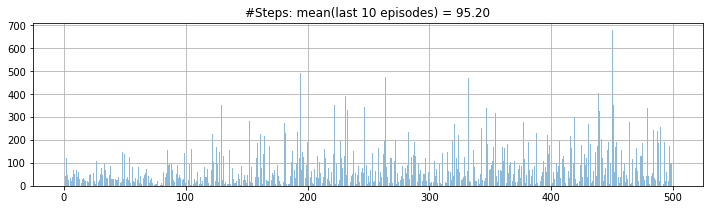

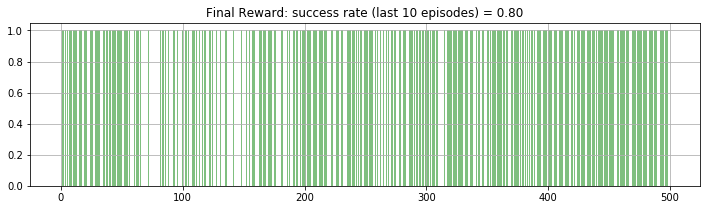

In [91]:
import torch
torch.__version__
import gym
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display

%matplotlib inline

from gym.envs.registration import register
#  Allow setting the environment!

'''
#(RUN ONCE)
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}, # stochastic
)
'''

env = gym.make('FrozenLakeNotSlippery-v0')
# get some info
nstates = env.observation_space.n
nactions = env.action_space.n
# Create the Q(s,a) table with torch
Q = torch.zeros([nstates,nactions])

# Experimental Design
nrun = 100 # repeate 100 times
nepisodes = 500
gammas = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,.975] # no delay discounting
lrs = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#gammas = [0.6,0.65] # no delay discounting
#lrs = [0.95,1]

all_dfres = []
for _ in range(nrun):
    print('*** Run#%d ***'%(_))
    # Results table
    dfres = pd.DataFrame(np.zeros([len(gammas)*len(lrs),4]),columns=['gamma','LR','#Steps(last10)','SuccessRate(last10)'])
    cont = 0
    for gamma in gammas:
        for lr in lrs:
            print('%d-'%(cont),end='')
            # Aux vars
            all_steps = []
            all_rewards = []
            dicA = {0:'left',1:'down',2:'right',3:'up'}
            for i in range(nepisodes):
                # Initial state
                state = env.reset()
                step = 0
                #print('*** Start of episode state:%d ***'%(state))

                while True:
                    step += 1

                    # 1) ACTION: random sample based on the Q(state) - think like distrib!
                    rand_R = Q[state]+torch.rand(1,nactions)/1000
                    action = torch.max(rand_R,1)[1][0] # return the index of action with max rand_R
                    # 2) NEXT STATE: given by the Gym environment
                    new_state, reward, done, info = env.step(action)
                    # 3) UPDATE Q(s,a): Bellman's Eq
                    #Q[state,action]= reward + gamma* torch.max(Q[new_state]) # Bellman's solution
                    Q[state,action]= (1-lr)*Q[state,action]+ lr*(reward + gamma* torch.max(Q[new_state])) # Q-learning

                    # Print some info
                    #print('Step%d: action=%s, state=%d, new_state=%d, reward=%d'%(step,dicA[action],state,new_state,reward))
                    #env.render()

                    # 4) UPDATE next state
                    state = new_state

                    # 5) GAME-OVER: if get done from environment
                    if done:
                        # Gather info
                        all_steps.append(step)
                        all_rewards.append(reward) # failure:0/success:1 when done
                        #print('Game over at step:%d'%step)
                        break
            dfres.iloc[cont]['gamma'] = gamma
            dfres.iloc[cont]['LR'] = lr
            dfres.iloc[cont]['#Steps(last10)'] = np.mean(all_steps)
            dfres.iloc[cont]['SuccessRate(last10)'] = np.mean(all_rewards)
            cont +=1
        
    display(dfres)
    all_dfres.append(dfres)

# Analysis
dfx = pd.concat(all_dfres)
summary_df = dfx.groupby(dfx.index).mean()
print('Summary (average across 10 runs)')
display(summary_df)

print('Q(s,a) table:',Q)
plt.figure(figsize=(12,3))
plt.title('#Steps: mean(last 10 episodes) = %.2f'%(sum(all_steps[-10:])/10))
plt.bar(range(len(all_steps)),all_steps,alpha=0.5)
plt.grid()
plt.show()

plt.figure(figsize=(12,3))
plt.title('Final Reward: success rate (last 10 episodes) = %.2f'%(sum(all_rewards[-10:])/10))
plt.bar(range(len(all_rewards)),all_rewards,alpha=0.5,color='green')
plt.grid()
plt.show()


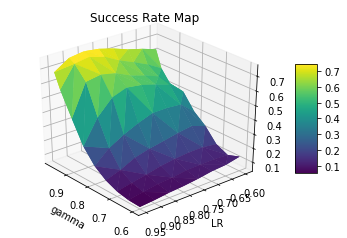

In [92]:
# Plot Resuls: 3D visualization of optimal parameters: {gamma, LR}

from mpl_toolkits.mplot3d import Axes3D

# Make the plot
df = summary_df

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['gamma'], df['LR'], df['SuccessRate(last10)'], cmap=plt.cm.viridis, linewidth=0.2)
plt.title('Success Rate Map')
plt.xlabel('gamma')
plt.ylabel('LR')
#plt.show()

# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['gamma'], df['LR'], df['SuccessRate(last10)'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
#plt.show()
 
# Rotate it
ax.view_init(30, 140)
plt.show()

### Example: Frozen Lake (Stochastic) + Adaptive E-greedy

- Random action (exploration) with prob:epsilon
- Decay epsilon: edecay

*** Run#0 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,67.64,0.586


*** Run#1 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,93.372,0.816


*** Run#2 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,81.344,0.834


*** Run#3 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,94.05,0.802


*** Run#4 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,91.188,0.836


*** Run#5 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,92.904,0.85


*** Run#6 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,77.634,0.674


*** Run#7 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,91.564,0.808


*** Run#8 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,87.862,0.818


*** Run#9 ***
0-

,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,90.958,0.688


Summary (average across 10 runs)


,gamma,LR,#Steps(last10),SuccessRate(last10)
0,0.975,0.85,86.8516,0.7712


Q(s,a) table: 
 0.0004  0.2305  0.0005  0.0005
 0.0000  0.0004  0.0000  0.0988
 0.0002  0.0001  0.0001  0.0535
 0.0000  0.0000  0.0000  0.0279
 0.4039  0.0002  0.0004  0.0001
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0001  0.0007
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.7350
 0.0000  0.2244  0.0000  0.0000
 0.0002  0.0000  0.8460  0.0000
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.8414  0.0000
 0.0000  0.9998  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000
[torch.FloatTensor of size 16x4]



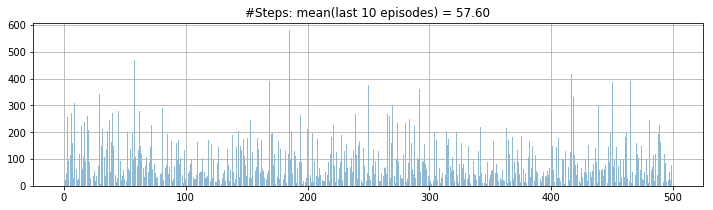

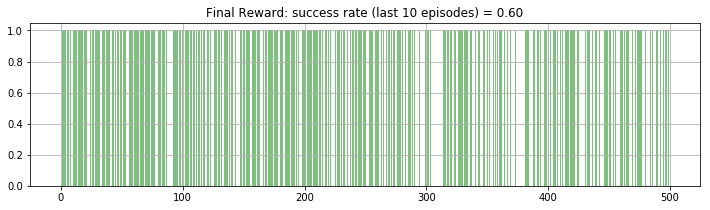

In [90]:
import torch
torch.__version__
import gym
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display

%matplotlib inline

from gym.envs.registration import register
#  Allow setting the environment!

'''
#(RUN ONCE)
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}, # stochastic
)
'''

env = gym.make('FrozenLakeNotSlippery-v0')
# get some info
nstates = env.observation_space.n
nactions = env.action_space.n
# Create the Q(s,a) table with torch
Q = torch.zeros([nstates,nactions])

# Experimental Design
nrun = 10 # repeate 10 times
nepisodes = 500
gammas = [.975] # no delay discounting
lrs = [0.85]

egreedy = 0.3
edecay = 0.99
egreedy_final = 0.01

all_dfres = []
for _ in range(nrun):
    print('*** Run#%d ***'%(_))
    # Results table
    dfres = pd.DataFrame(np.zeros([len(gammas)*len(lrs),4]),columns=['gamma','LR','#Steps(last10)','SuccessRate(last10)'])
    cont = 0
    for gamma in gammas:
        for lr in lrs:
            print('%d-'%(cont),end='')
            # Aux vars
            all_steps = []
            all_rewards = []
            dicA = {0:'left',1:'down',2:'right',3:'up'}
            for i in range(nepisodes):
                # Initial state
                state = env.reset()
                step = 0
                #print('*** Start of episode state:%d ***'%(state))

                while True:
                    step += 1

                    if egreedy > egreedy_final:
                        if np.random.random() < egreedy:
                            action = env.action_space.sample()
                        else:
                            # 1) ACTION: random sample based on the Q(state) - think like distrib!
                            rand_R = Q[state]+torch.rand(1,nactions)/1000
                            action = torch.max(rand_R,1)[1][0] # return the index of action with max rand_R
                        egreedy = egreedy*edecay
                    else:                        
                        # 1) ACTION: random sample based on the Q(state) - think like distrib!
                        rand_R = Q[state]+torch.rand(1,nactions)/1000
                        action = torch.max(rand_R,1)[1][0] # return the index of action with max rand_R

                    # 2) NEXT STATE: given by the Gym environment
                    new_state, reward, done, info = env.step(action)
                    # 3) UPDATE Q(s,a): Bellman's Eq
                    #Q[state,action]= reward + gamma* torch.max(Q[new_state]) # Bellman's solution
                    Q[state,action]= (1-lr)*Q[state,action]+ lr*(reward + gamma* torch.max(Q[new_state])) # Q-learning

                    # Print some info
                    #print('Step%d: action=%s, state=%d, new_state=%d, reward=%d'%(step,dicA[action],state,new_state,reward))
                    #env.render()

                    # 4) UPDATE next state
                    state = new_state

                    # 5) GAME-OVER: if get done from environment
                    if done:
                        # Gather info
                        all_steps.append(step)
                        all_rewards.append(reward) # failure:0/success:1 when done
                        #print('Game over at step:%d'%step)
                        break
            dfres.iloc[cont]['gamma'] = gamma
            dfres.iloc[cont]['LR'] = lr
            dfres.iloc[cont]['#Steps(last10)'] = np.mean(all_steps)
            dfres.iloc[cont]['SuccessRate(last10)'] = np.mean(all_rewards)
            cont +=1
        
    display(dfres)
    all_dfres.append(dfres)

# Analysis
dfx = pd.concat(all_dfres)
summary_df = dfx.groupby(dfx.index).mean()
print('Summary (average across 10 runs)')
display(summary_df)

print('Q(s,a) table:',Q)
plt.figure(figsize=(12,3))
plt.title('#Steps: mean(last 10 episodes) = %.2f'%(sum(all_steps[-10:])/10))
plt.bar(range(len(all_steps)),all_steps,alpha=0.5)
plt.grid()
plt.show()

plt.figure(figsize=(12,3))
plt.title('Final Reward: success rate (last 10 episodes) = %.2f'%(sum(all_rewards[-10:])/10))
plt.bar(range(len(all_rewards)),all_rewards,alpha=0.5,color='green')
plt.grid()
plt.show()

# Neural Networks in Pytorch

- Ref: Pytorch tutorial: https://pytorch.org/tutorials/
- Tensor replaces numpy.ndarray to allow GPU computation!

In [1]:
# Basic Imports
import torch
import torch.nn as nn # Neural net library
import torch.optim as optim # Optimization library
import torch.nn.functional as F # Non-linear functions
from torch.autograd import Variable # Computation Graph module to get Gradients

In [2]:
# GPU or CPU
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_cuda else torch.ByteTensor
Tensor = FloatTensor

In [4]:
# Example: Regression with Pytorch
w = 2
b = 0.3

# Create x in Pytorch format
aux = torch.arange(100)
print(aux.shape)
x = Variable(aux.unsqueeze(1)) # Add dimension 1
print(x.shape)

torch.Size([100])
torch.Size([100, 1])


In [9]:
xx = Variable(aux)
yy = w*xx+b
yy.shape

torch.Size([100])

In [122]:
# Original Line
y = w*x + b
y.shape

torch.Size([100, 1])

In [ ]:
# Define a simple 1 to 1 NN
class NeuralNet(nn.Module): # self inherits the class nn.Module
    def __init__(self):
        super(NeuralNet, self).__init__() # Call parent's init
        self.linear1 = nn.Linear(1,1) # 1 to 1  Layer parameters
        
    def forward(self,x):
        output = self.linear1(x)
        return output